- This notebook aims to:
    - read stock data using pandas datareader
    - visualize stock data
    - application of SMA as an indicator
- The strategy used in this example notebook is Simple Moving Average abbreviated as SMA
- SMA is a common indicator in technical analysis though a lagging indicator because it is dependent on past data amd prices
- SMA is a calculation that takes the arithmetic mean of a given set of prices over a specified number of periods.
- SMA helps to uncover the direction (bullish or bearish) of the trend in the data 
- Short term SMA crossing above/ over long term SMA indicates bullish movement of the price data
- The SMA strategy is to enter a buy position when SMA short term is above long term and enter a sell position when short term is below long term.
- While long term SMA crossing above/over the short term SMA indicates  a bearish movement of the price data of the stock (or cryptocurrency)
- Period  = 50 was used for the short term while period = 200 was used for the long term. 
- Period in here is DAY
- The mathematics behind SMA goes thus: 

$$ SMA = \dfrac{(A_1+A_2+A_3+...+A_n)}{n} $$

In [6]:
### Import packages
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np

import mplfinance
#from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpdates

In [7]:
### Specify MA periods to use
"""- ma_1 --> short term MA
- ma_2 --> long term MA"""
#### * try to understand MA 
ma_1  =9
ma_2 = 21

In [8]:
### Declare start and end time
start = dt.datetime.now() - dt.timedelta(days = 365 * 3)
end= dt.datetime.now()

### read data
"""you need internet connection to read data from pandas datareader.
pdr fetches daata from yahoo dailyreader which does not contain crypto data except for BTC"""
ticker = 'FB'
data = pdr.DataReader(ticker,'yahoo', start, end)
print(data.head())

                  High         Low        Open       Close    Volume  \
Date                                                                   
2021-11-26  337.750000  331.899994  335.799988  333.119995  14750700   
2021-11-29  340.670013  335.309998  336.890015  338.029999  16650900   
2021-11-30  335.809998  323.429993  335.000000  324.459991  25390000   
2021-12-01  330.500000  310.290009  330.290009  310.600006  30329600   
2021-12-02  314.600006  307.200012  311.399994  310.390015  24396200   

             Adj Close  
Date                    
2021-11-26  333.119995  
2021-11-29  338.029999  
2021-11-30  324.459991  
2021-12-01  310.600006  
2021-12-02  310.390015  


In [9]:
### EDA
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-26 to 2022-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [10]:
### clean data

## drop off columns we're not using 
#data.drop(columns = ['Volume','Close'], inplace = True)
## add day column
day = np.arange(1, len(data)+1)
data['day'] = day
## rearrange dataset columns
data = data[['day','Open','High','Low','Close','Adj Close', 'Volume']]

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-26 to 2022-11-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   day        252 non-null    int32  
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int32(1), int64(1)
memory usage: 14.8 KB
None


,day,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-11-26,1,335.799988,337.750000,331.899994,333.119995,333.119995,14750700
2021-11-29,2,336.890015,340.670013,335.309998,338.029999,338.029999,16650900
2021-11-30,3,335.000000,335.809998,323.429993,324.459991,324.459991,25390000
2021-12-01,4,330.290009,330.500000,310.290009,310.600006,310.600006,30329600
2021-12-02,5,311.399994,314.600006,307.200012,310.390015,310.390015,24396200


In [11]:
# Define the Moving averages and add them as columns to the data
### shift() to remove the look ahead information
""" *... by rolling forward by one day with the shift() method in pd """

data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window = ma_1).mean().shift()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window = ma_2).mean().shift()

In [12]:
# Exclude the NA values computed in the SMA 50 and 200
"""we'll work on the SMA 200 beign the longest"""
data.dropna(inplace = True)

data.head(20)

,day,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21
Date,,,,,,,,,
2021-12-28,22,346.630005,352.709991,345.200012,346.220001,346.220001,16637600,335.067780,328.778572
2021-12-29,23,346.910004,349.690002,341.640015,342.940002,342.940002,10747000,336.454447,329.402382
2021-12-30,24,344.000000,347.230011,343.220001,344.359985,344.359985,10593300,336.596670,329.636191
2021-12-31,25,343.019989,343.440002,336.269989,336.350006,336.350006,12870500,337.647780,330.583810
2022-01-03,26,338.299988,341.079987,337.190002,338.540009,338.540009,14537900,337.932224,331.810000
2022-01-04,27,339.950012,343.089996,331.869995,336.529999,336.529999,15998000,339.386668,333.150476
2022-01-05,28,333.019989,335.760010,323.839996,324.170013,324.170013,20564500,339.645555,334.564286
2022-01-06,29,322.820007,339.170013,322.720001,332.459991,332.459991,27962800,338.947778,334.864287
2022-01-07,30,332.739990,337.000000,328.880005,331.790009,331.790009,14722000,338.638889,335.323810


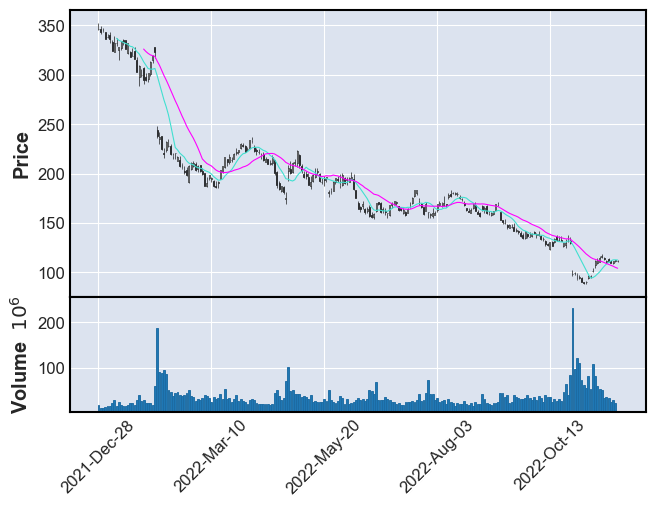

In [13]:
#mplfinance.rcParams['figure.figsize'] = 20,6
""" Using the mplfinance library, I plotted the candlestick chart, ma_1, ma_2 and volume chart of the ticker below """

### plot candlestick chart
mplfinance.plot(data, type='candle',mav=(ma_1,ma_2),volume=True)

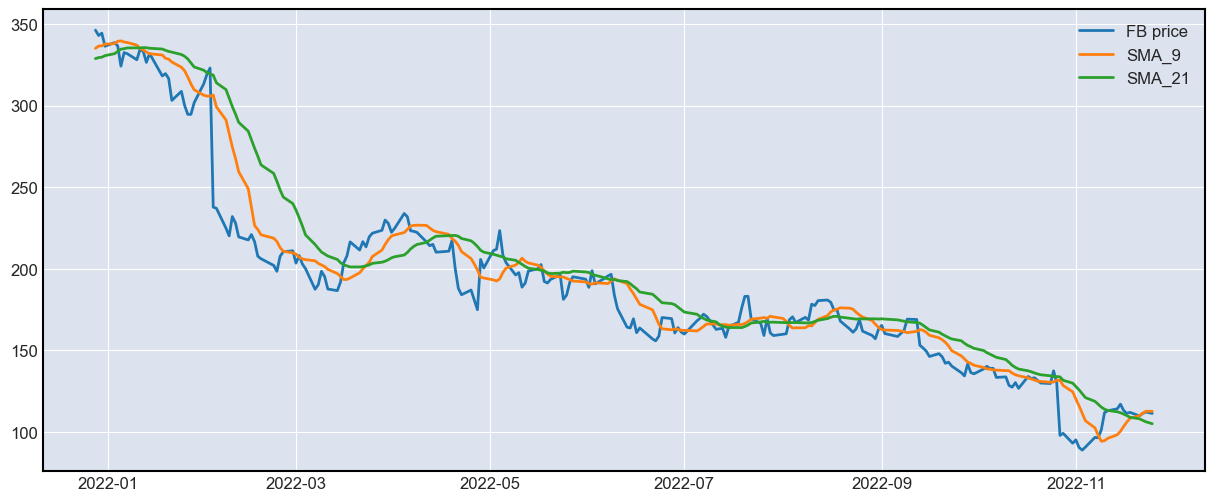

In [18]:
### plot the chart and MAs
plt.rcParams['figure.figsize'] = 15,6
# close chart
plt.plot(data['Adj Close'], label = f'{ticker} price')
# MA 1
plt.plot(data[f'SMA_{ma_1}'], label = f'SMA_{ma_1}' )
# MA 2
plt.plot(data[f'SMA_{ma_2}'],  label = f'SMA_{ma_2}', linestyle = "-")
plt.legend(loc = 1)
plt.show()

As we notice in the chart above, the smoother line is the long term SMA and the not too smooth line is the short term SMA.

In [15]:
data['signal']  =np.where(data[f'SMA_{ma_1}'] > data[f'SMA_{ma_2}'],1,0)
data['signal']  =np.where(data[f'SMA_{ma_1}'] < data[f'SMA_{ma_2}'],-1,data['signal'])
data.iloc[30:50]

,day,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,signal
Date,,,,,,,,,,
2022-02-09,52,224.199997,233.369995,222.210007,232.000000,232.000000,86563300,274.616667,299.361429,-1
2022-02-10,53,228.270004,235.000000,226.699997,228.070007,228.070007,49310400,267.656665,294.786667,-1
2022-02-11,54,228.460007,230.419998,218.770004,219.550003,219.550003,46156900,259.474445,289.724763,-1
2022-02-14,55,219.309998,221.000000,214.779999,217.699997,217.699997,38184000,249.062222,284.310000,-1
2022-02-15,56,220.470001,221.149994,215.059998,221.000000,221.000000,42685500,237.806666,279.130000,-1
2022-02-16,57,212.410004,217.460007,212.360001,216.539993,216.539993,45817500,226.473333,273.849048,-1
2022-02-17,58,214.020004,217.500000,207.160004,207.710007,207.710007,38747500,224.115555,269.010476,-1
2022-02-18,59,209.389999,210.750000,205.179993,206.160004,206.160004,37128400,220.851112,263.682858,-1
2022-02-22,60,202.339996,207.479996,200.059998,202.080002,202.080002,39852400,218.767778,258.425715,-1


In [16]:
###  compute entry  - 
""" to calc entry, 
signal 1 means long while -1 means short
    1-(-1) = 2 = enter a buy and exit the sell position
    -1-1 = -2 = enter a short position and exit the long position simultaneously
    1-1 = 0 = no entry
    -1-1 = 0 = no entry
 """
data['entry'] = data['signal'].diff()

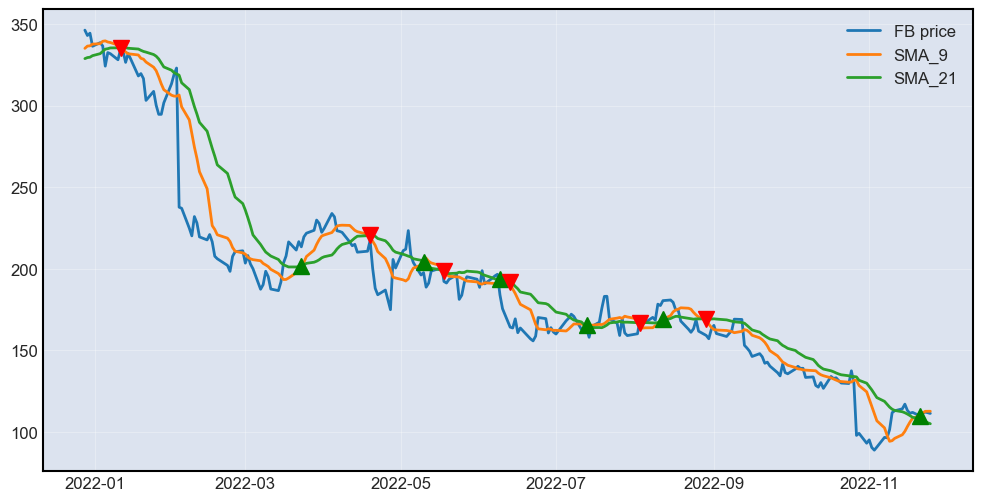

In [17]:
### Plot the whoe graph again with entry point
plt.rcParams['figure.figsize'] = 12,6
plt.grid(True, alpha= .3)
plt.plot(data['Adj Close'], label = f'{ticker} price')
plt.plot(data[f'SMA_{ma_1}'], label = f'SMA_{ma_1}')
plt.plot(data[f'SMA_{ma_2}'],  label = f'SMA_{ma_2}', linestyle = "-")
### plot the long and short entry points
plt.plot(data.loc[data.entry == 2].index, data[f'SMA_{ma_1}'][data.entry == 2],
        '^',color = 'g', markersize = 12)
plt.plot(data.loc[data.entry == -2].index, data[f'SMA_{ma_2}'][data.entry == -2],
        'v',color = 'r', markersize = 12)
plt.legend(loc = 1)
plt.show()